In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# ----- CONCEPTOS TE√ìRICOS 

## =============================================================
## 1. BIAS-VARIANCE TRADE-OFF (SESGO-VARIANZA)
## =============================================================
"""
Explicaci√≥n:
- Alto Bias: Modelo demasiado simple -> Subajuste (Underfitting)
- Alta Varianza: Modelo demasiado complejo -> Sobreajuste (Overfitting)
- El objetivo es encontrar el equilibrio √≥ptimo
"""


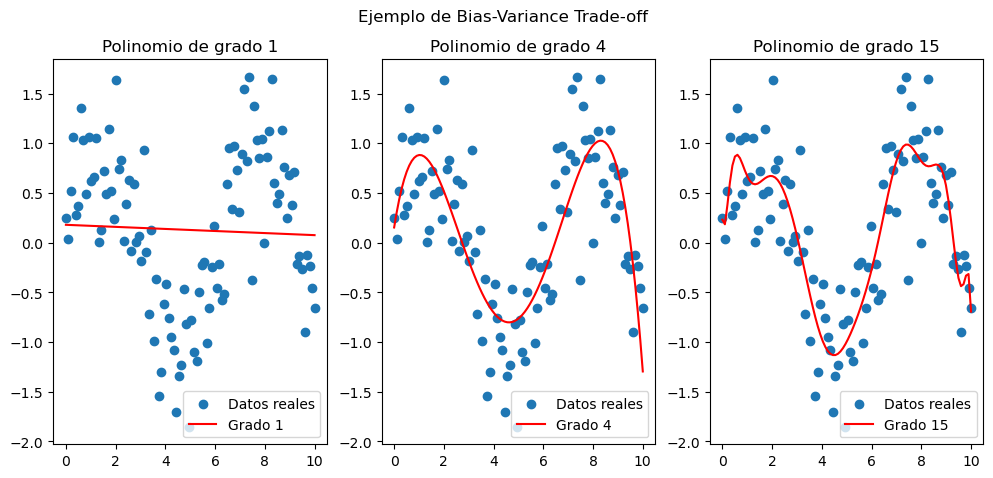

In [3]:
np.random.seed(42)
X = np.linspace(0, 10, 100)
y_true = np.sin(X) + np.random.normal(scale=0.5, size=X.shape)

# Modelos con diferente complejidad
poly_degrees = [1, 4, 15]
plt.figure(figsize=(12, 5))

for i, d in enumerate(poly_degrees, 1):
    coefs = np.polyfit(X, y_true, d)
    y_pred = np.polyval(coefs, X)
    plt.subplot(1, 3, i)
    plt.scatter(X, y_true, label="Datos reales")
    plt.plot(X, y_pred, color='red', label=f'Grado {d}')
    plt.title(f'Polinomio de grado {d}')
    plt.legend()

plt.suptitle("Ejemplo de Bias-Variance Trade-off")
plt.show()

# =============================================================
# 2. PAR√ÅMETROS vs. HIPERPAR√ÅMETROS
# =============================================================

- Par√°metros: Se aprenden del entrenamiento (ej. coeficientes en regresi√≥n)
- Hiperpar√°metros: Configuraciones ajustadas antes del entrenamiento (ej. profundidad m√°xima)


In [4]:
# Ejemplo: Hiperpar√°metro en √Årbol de Decisi√≥n
X, y = np.random.rand(200, 2), np.random.choice([0, 1], size=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in [1, 5, 10]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    print(f"Profundidad {depth} - Accuracy: {accuracy_score(y_test, model.predict(X_test)):.3f}")

Profundidad 1 - Accuracy: 0.483
Profundidad 5 - Accuracy: 0.433
Profundidad 10 - Accuracy: 0.383


# =============================================================
# 3. SOBREAJUSTE VS. SUBAJUSTE
# =============================================================

Explicaci√≥n sencilla:
- **Sobreajuste (Overfitting)**: Ocurre cuando el modelo aprende demasiado bien los detalles y el ruido del conjunto de entrenamiento, pero no puede generalizar bien a datos nuevos.
- **Subajuste (Underfitting)**: Ocurre cuando el modelo es demasiado simple y no logra capturar los patrones reales de los datos, lo que lo hace ineficaz en entrenamiento y prueba.

Ejemplo:
- Un modelo con demasiados par√°metros memoriza los datos pero falla en test (sobreajuste).
- Un modelo con pocos par√°metros no capta la relaci√≥n real entre variables (subajuste).


# =============================================================
# 4. M√âTRICAS DE EVALUACI√ìN
# =============================================================

- **M√©tricas en regresi√≥n:**
  - **Error Absoluto Medio (MAE)**: Promedio de los valores absolutos de los errores.
  - **Error Cuadr√°tico Medio (MSE)**: Promedio de los errores al cuadrado.
  - **Ra√≠z del Error Cuadr√°tico Medio (RMSE)**: Ra√≠z cuadrada del MSE.
  - **Coeficiente de determinaci√≥n (R¬≤)**: Indica qu√© proporci√≥n de la variabilidad de la variable objetivo es explicada por el modelo.

- **M√©tricas en clasificaci√≥n:**
  - **Exactitud (Accuracy)**: Proporci√≥n de predicciones correctas.
  - **Precisi√≥n (Precision)**: Proporci√≥n de verdaderos positivos sobre todas las predicciones positivas.
  - **Recall (Sensibilidad)**: Proporci√≥n de verdaderos positivos sobre los casos reales positivos.
  - **F1-Score**: Media arm√≥nica entre precisi√≥n y recall.
  - **Matriz de Confusi√≥n**: Tabla que muestra la relaci√≥n entre predicciones y valores reales.
  - etc...
"""

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sklearn
import os

In [7]:
os.getcwd()

'/Users/joseperez/Documents/GitHub/python-statlearning-lab/week_4'

In [12]:
path = "./data/Churn_Modelling.csv"
churn_df = pd.read_csv(path)
churn_df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# =============================================================
# 1. PROBLEMA DE CLASIFICACI√ìN: PREDICCI√ìN DE DESERCI√ìN DE CLIENTES BANCARIOS
# =============================================================
"""
### **Descripci√≥n del Problema**
El objetivo de este problema de clasificaci√≥n es desarrollar un modelo predictivo que, basado en los atributos de los clientes y su puntaje de cr√©dito, pueda determinar si un cliente abandonar√° el banco en el futuro.

### **Sobre los Datos**
- Los datos provienen de Kaggle y pueden descargarse desde [este enlace](https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction).
- La variable objetivo en el dataset es `Exited`, y el modelo debe predecir si su valor ser√° 1 (cliente que abandona) o 0 (cliente que permanece).

### **Algoritmos a Utilizar**
Dado que se trata de un problema de clasificaci√≥n binaria, se emplear√°n los siguientes algoritmos de aprendizaje supervisado:
- **Regresi√≥n Log√≠stica**
- **√Årboles de Decisi√≥n**

### **M√©tricas de Evaluaci√≥n**
Para evaluar el rendimiento de los modelos, se utilizar√°n las siguientes m√©tricas:
- **Exactitud (Accuracy Score)**: Proporci√≥n de predicciones correctas sobre el total de observaciones.
- **Precisi√≥n (Precision)**: Indica cu√°ntas de las predicciones positivas fueron realmente positivas.
- **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**: Eval√∫a cu√°ntos casos positivos reales fueron correctamente identificados.
- **F1-Score**: Media arm√≥nica entre precisi√≥n y recall, √∫til en casos de datos desbalanceados.
- **Log Loss**: Eval√∫a la incertidumbre en las probabilidades de clasificaci√≥n.
"""

In [14]:
# Definimos las caracter√≠sticas redundantes
redundant_features = ["RowNumber", "CustomerId", "Surname"]

# Eliminamos estas columnas del DataFrame
churn_df_final = churn_df.drop(redundant_features, axis=1)

# Mostramos la primera fila del nuevo DataFrame
churn_df_final.head(1)

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France  Female   42       2      0.0              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1

In [15]:
# Definir el diccionario de reemplazo
gender_dict = {'Male': 1, 'Female': 0}

# Reemplazar los valores en la columna 'Gender'
churn_df_final['Gender'] = churn_df_final['Gender'].replace(gender_dict)

In [16]:
# Aplicar One-Hot Encoding a la columna 'Geography'
final_df_encoded = pd.get_dummies(churn_df_final, columns=['Geography'])

In [17]:
from sklearn.model_selection import train_test_split

# Separar las caracter√≠sticas (X) y la variable objetivo (y)
X = final_df_encoded.drop(['Exited'], axis=1)  # Eliminamos la variable objetivo del dataset
y = final_df_encoded['Exited']  # Variable objetivo

# Dividir los datos en 80% entrenamiento y 20% prueba
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mostrar la cantidad de datos en cada conjunto
print(f"Total de registros: {len(final_df_encoded)}\n")
print(f"Cantidad de datos de entrenamiento: {len(train_data)}\n")
print(f"Cantidad de datos de prueba: {len(test_data)}\n")
print(f"Cantidad de etiquetas de entrenamiento: {len(train_labels)}\n")
print(f"Cantidad de etiquetas de prueba: {len(test_labels)}\n")

# Verificaci√≥n: asegurarnos de que el n√∫mero de filas coincide
assert len(train_data) == len(train_labels)
assert len(test_data) == len(test_labels)

Total de registros: 10000

Cantidad de datos de entrenamiento: 8000

Cantidad de datos de prueba: 2000

Cantidad de etiquetas de entrenamiento: 8000

Cantidad de etiquetas de prueba: 2000



In [18]:
# Importar los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Crear diccionario con los modelos a entrenar
model_instances = {
    'logistic_regressor': LogisticRegression(),  # Regresi√≥n Log√≠stica
    'knn': KNeighborsClassifier()  # K-Nearest Neighbors (KNN)
}

# Entrenar cada modelo en el conjunto de entrenamiento
for model_name, model in model_instances.items():
    model.fit(train_data, train_labels)  # Ajustar el modelo con los datos de entrenamiento
    model_instances[model_name] = model  # Guardar el modelo entrenado

In [24]:
def calculate_metrics(conf_matrix):
    """
    Funci√≥n para calcular m√©tricas de TP, TN, FP, FN a partir de la matriz de confusi√≥n.

    Par√°metro:
    - conf_matrix: Matriz de confusi√≥n generada por confusion_matrix()

    Retorna:
    - Diccionario con valores de TP, TN, FP, FN
    """
    TP = conf_matrix[1, 1]  # Verdaderos Positivos (Churn predicho correctamente)
    TN = conf_matrix[0, 0]  # Verdaderos Negativos (No Churn predicho correctamente)
    FP = conf_matrix[0, 1]  # Falsos Positivos (No Churn mal predicho como Churn)
    FN = conf_matrix[1, 0]  # Falsos Negativos (Churn mal predicho como No Churn)

    return {"TP": TP, "TN": TN, "FP": FP, "FN": FN}

# Obtener m√©tricas de cada modelo
metrics_log = calculate_metrics(conf_mat_log)
metrics_knn = calculate_metrics(conf_mat_knn)

print("M√©tricas de Regresi√≥n Log√≠stica:", metrics_log)
print("M√©tricas de KNN:", metrics_knn)

M√©tricas de Regresi√≥n Log√≠stica: {'TP': 28, 'TN': 1573, 'FP': 34, 'FN': 365}
M√©tricas de KNN: {'TP': 37, 'TN': 1491, 'FP': 116, 'FN': 356}


In [25]:
from sklearn.metrics import classification_report

def evaluate_model(model, test_data, test_labels, model_name):
    """
    Funci√≥n para evaluar un modelo y mostrar el reporte de clasificaci√≥n.

    Par√°metros:
    - model: Modelo entrenado
    - test_data: Datos de prueba
    - test_labels: Etiquetas reales
    - model_name: Nombre del modelo para mostrar en la evaluaci√≥n
    """
    y_pred = model.predict(test_data)
    
    print(f"Reporte de Clasificaci√≥n - {model_name}:\n")
    print(classification_report(test_labels, y_pred, target_names=["No Churn", "Churn"]))
    print("-" * 50)

# Evaluar Regresi√≥n Log√≠stica
evaluate_model(model_instances['logistic_regressor'], test_data, test_labels, "Regresi√≥n Log√≠stica")

# Evaluar K-Nearest Neighbors (KNN)
evaluate_model(model_instances['knn'], test_data, test_labels, "K-Nearest Neighbors")

Reporte de Clasificaci√≥n - Regresi√≥n Log√≠stica:

              precision    recall  f1-score   support

    No Churn       0.81      0.98      0.89      1607
       Churn       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

--------------------------------------------------
Reporte de Clasificaci√≥n - K-Nearest Neighbors:

              precision    recall  f1-score   support

    No Churn       0.81      0.93      0.86      1607
       Churn       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000

--------------------------------------------------


# üìå 1Ô∏è‚É£ M√©tricas de Evaluaci√≥n

Para evaluar el rendimiento de un modelo de clasificaci√≥n, utilizamos varias m√©tricas que nos permiten entender qu√© tan bien est√° prediciendo las clases correctas.

A continuaci√≥n, explicamos cada m√©trica con su **f√≥rmula matem√°tica** y su **interpretaci√≥n pr√°ctica**.

---

## ‚úÖ 2Ô∏è‚É£ Exactitud (Accuracy Score)

### üìñ Definici√≥n
La **exactitud** mide la **proporci√≥n de predicciones correctas** sobre el total de observaciones.

### üìå F√≥rmula Matem√°tica
\[
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]

### üìä Interpretaci√≥n
- Indica **qu√© porcentaje del total de casos fueron correctamente clasificados**.
- Puede ser **enga√±osa en datasets desbalanceados**, ya que **un modelo puede obtener alta Accuracy simplemente prediciendo siempre la clase mayoritaria**.

---

## ‚úÖ 3Ô∏è‚É£ Precisi√≥n (Precision)
### üìñ Definici√≥n
La **precisi√≥n** mide qu√© porcentaje de las predicciones positivas fueron realmente correctas.

### üìå F√≥rmula Matem√°tica
\[
\text{Precision} = \frac{TP}{TP + FP}
\]

### üìä Interpretaci√≥n
- Nos dice qu√© tan **confiable** es el modelo al predecir la clase positiva.
- **√ötil cuando los falsos positivos (FP) son costosos** (ejemplo: diagn√≥stico de c√°ncer, donde un FP significar√≠a un diagn√≥stico err√≥neo de la enfermedad).

### üèÜ **Ejemplo en Churn**
- **Alta Precisi√≥n** ‚Üí Cuando el modelo dice que un cliente va a abandonar, realmente lo hace.
- **Baja Precisi√≥n** ‚Üí El modelo predice que un cliente abandonar√°, pero en realidad se queda (FP alto).

---

## ‚úÖ 4Ô∏è‚É£ Recall (Sensibilidad o Tasa de Verdaderos Positivos)
### üìñ Definici√≥n
El **recall** mide cu√°ntos de los casos positivos reales fueron correctamente identificados por el modelo.

### üìå F√≥rmula Matem√°tica
\[
\text{Recall} = \frac{TP}{TP + FN}
\]

### üìä Interpretaci√≥n
- Eval√∫a la **capacidad del modelo para detectar correctamente los casos positivos**.
- **√ötil cuando los falsos negativos (FN) son costosos** (ejemplo: detectar fraudes bancarios o fallos en un sistema de seguridad).

### üèÜ **Ejemplo en Churn**
- **Alto Recall** ‚Üí Si un cliente realmente va a abandonar, el modelo lo detecta correctamente.
- **Bajo Recall** ‚Üí Muchos clientes que realmente abandonan **no son detectados** por el modelo (FN alto).

---

## ‚úÖ 5Ô∏è‚É£ F1-Score
### üìñ Definici√≥n
El **F1-score** es la **media arm√≥nica entre precisi√≥n y recall**. Se usa cuando **hay un desbalance de clases** y queremos encontrar un equilibrio entre **precisi√≥n y recall**.

### üìå F√≥rmula Matem√°tica
\[
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]

### üìä Interpretaci√≥n
- **Mejor que Accuracy en datasets desbalanceados**, ya que toma en cuenta tanto FP como FN.
- **√ötil cuando queremos minimizar simult√°neamente los FP y FN**.

### üèÜ **Ejemplo en Churn**
- **F1-score alto** ‚Üí Indica que el modelo tiene un **buen balance** entre precisi√≥n y recall.
- **F1-score bajo** ‚Üí Indica que el modelo no est√° detectando bien los casos positivos o tiene demasiados FP.

---

## ‚úÖ 6Ô∏è‚É£ Log Loss (Logarithmic Loss)
### üìñ Definici√≥n
**Log Loss** mide la **incertidumbre** en las probabilidades de clasificaci√≥n, penalizando predicciones incorrectas con una probabilidad m√°s alta.

### üìå F√≥rmula Matem√°tica
\[
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{p_i}) + (1 - y_i) \log(1 - \hat{p_i}) \right]
\]

Donde:
- \( y_i \) es la etiqueta real (0 o 1).
- \( \hat{p_i} \) es la probabilidad predicha de la clase positiva.
- \( N \) es el n√∫mero total de observaciones.

### üìä Interpretaci√≥n
- **Log Loss bajo** ‚Üí El modelo asigna probabilidades cercanas a 1 para la clase correcta.
- **Log Loss alto** ‚Üí El modelo tiene **alta incertidumbre en las predicciones**.

### üèÜ **Ejemplo en Churn**
- Si un cliente realmente abandona y el modelo predice **0.95** de probabilidad de abandono, **Log Loss es bajo**.
- Si el modelo predice **0.50** de probabilidad para un cliente que en realidad abandona, **Log Loss ser√° alto** porque la predicci√≥n es incierta.

---

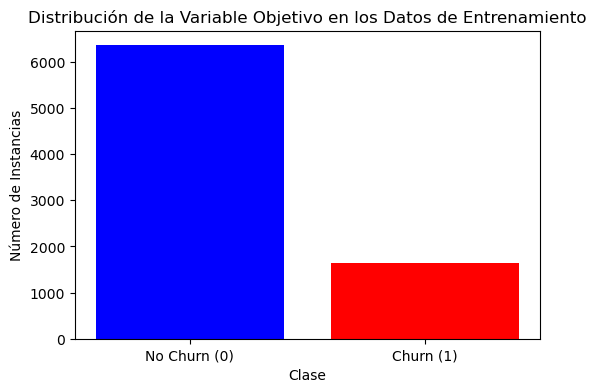

Proporci√≥n de No Churn (0): 79.45%
Proporci√≥n de Churn (1): 20.55%


In [27]:
# Contar las instancias de cada clase en el conjunto de entrenamiento
class_counts = np.bincount(train_labels)

# Visualizar el desbalance de clases
plt.figure(figsize=(6, 4))
plt.bar(["No Churn (0)", "Churn (1)"], class_counts, color=["blue", "red"])
plt.xlabel("Clase")
plt.ylabel("N√∫mero de Instancias")
plt.title("Distribuci√≥n de la Variable Objetivo en los Datos de Entrenamiento")
plt.show()

# Imprimir proporci√≥n de cada clase
total = len(train_labels)
print(f"Proporci√≥n de No Churn (0): {class_counts[0] / total:.2%}")
print(f"Proporci√≥n de Churn (1): {class_counts[1] / total:.2%}")

# ===============================================================================
# EJEMPLO DE √ÅRBOL DE DECISI√ìN Y REGRESI√ìN LOG√çSTICA
# ===============================================================================
"""
En esta secci√≥n, crearemos un dataset simulado donde la variable objetivo (Ama_Emilia_Perez)
depende de la edad de forma NO lineal. Luego compararemos un √Årbol de Decisi√≥n vs. 
Regresi√≥n Log√≠stica, evalu√°ndolos con m√∫ltiples m√©tricas.
"""

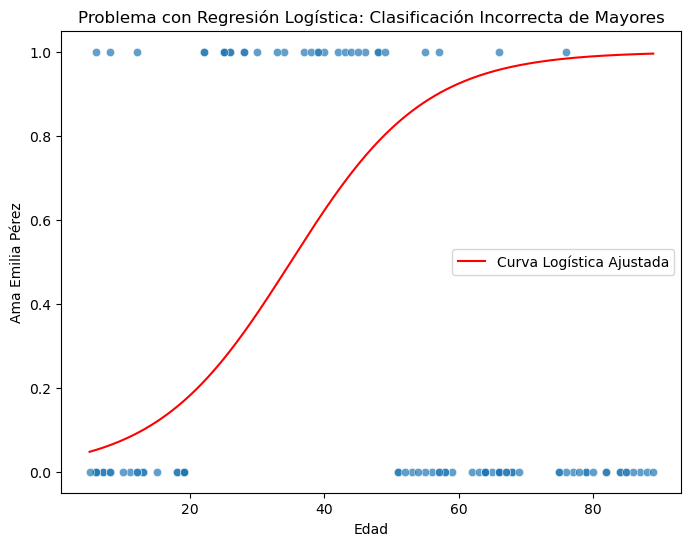

Comparaci√≥n de Modelos:


M√©tricas para √Årbol de Decisi√≥n (Gini):
Precisi√≥n: 0.8666666666666667
Matriz de Confusi√≥n:
 [[17  1]
 [ 3  9]]
Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.90      0.75      0.82        12

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30


M√©tricas para √Årbol de Decisi√≥n (Entrop√≠a):
Precisi√≥n: 0.8666666666666667
Matriz de Confusi√≥n:
 [[17  1]
 [ 3  9]]
Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.90      0.75      0.82        12

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30


M√©tricas para Regresi√≥

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import sympy as sp
from scipy.special import expit

# ---------------------------------------------------------------------------------
# Introducci√≥n
# Implementaci√≥n de un √Årbol de Decisi√≥n de Clasificaci√≥n y comparaci√≥n con la 
# Regresi√≥n Log√≠stica, siguiendo las mejores pr√°cticas explicadas en libros de referencia.
# Se ajusta el dataset para reflejar las limitaciones de la regresi√≥n log√≠stica.
# ---------------------------------------------------------------------------------

# Paso 1: Creaci√≥n del dataset simulado con limitaci√≥n para regresi√≥n log√≠stica
np.random.seed(42)
edades = np.random.randint(5, 90, size=100)
likes_middle = (edades > 20) & (edades < 50)  # Personas de edad media aman Emilia P√©rez
likes_old = np.random.choice([0, 1], size=100, p=[0.9, 0.1])  # Mayores tienen menor probabilidad
likes_young = np.random.choice([0, 1], size=100, p=[0.8, 0.2])  # J√≥venes tambi√©n menor probabilidad

ama_emilia_perez = np.where(likes_middle, 1, np.where(edades >= 50, likes_old, likes_young))

data = {
    'Ama_Palomitas': np.random.choice([1, 0], size=100),  # 1: S√≠, 0: No
    'Ama_Refresco': np.random.choice([1, 0], size=100),
    'Edad': edades,
    'Ama_Emilia_Perez': ama_emilia_perez  # Variable objetivo reflejando la distribuci√≥n problem√°tica
}

df = pd.DataFrame(data)

# ---------------------------------------------------------------------------------
# Paso 2: Divisi√≥n de datos en entrenamiento y prueba
# ---------------------------------------------------------------------------------
X = df[['Ama_Palomitas', 'Ama_Refresco', 'Edad']]
y = df['Ama_Emilia_Perez']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------------------------------------------------------------
# Paso 3: Visualizaci√≥n del problema con Regresi√≥n Log√≠stica
# ---------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Edad'], y=df['Ama_Emilia_Perez'], alpha=0.7)
plt.title("Problema con Regresi√≥n Log√≠stica: Clasificaci√≥n Incorrecta de Mayores")
plt.xlabel("Edad")
plt.ylabel("Ama Emilia P√©rez")

# Ajustar una curva log√≠stica
edad_rango = np.linspace(df['Edad'].min(), df['Edad'].max(), 300)
probabilidad_logistica = expit((edad_rango - 35) / 10)  # La regresi√≥n log√≠stica espera una relaci√≥n monot√≥nica
plt.plot(edad_rango, probabilidad_logistica, color='red', label='Curva Log√≠stica Ajustada')
plt.legend()
plt.show()

# ---------------------------------------------------------------------------------
# Paso 4: Creaci√≥n y comparaci√≥n del modelo con Gini y Entrop√≠a
# ---------------------------------------------------------------------------------
modelo_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
modelo_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
modelo_gini.fit(X_train, y_train)
modelo_entropy.fit(X_train, y_train)

# Regresi√≥n Log√≠stica
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# ---------------------------------------------------------------------------------
# Paso 5: Evaluaci√≥n y m√©tricas de desempe√±o
# ---------------------------------------------------------------------------------
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    predicciones = modelo.predict(X_test)
    print(f"\nM√©tricas para {nombre_modelo}:")
    print("Precisi√≥n:", accuracy_score(y_test, predicciones))
    print("Matriz de Confusi√≥n:\n", confusion_matrix(y_test, predicciones))
    print("Reporte de Clasificaci√≥n:\n", classification_report(y_test, predicciones))
    return predicciones

print("Comparaci√≥n de Modelos:\n")
pred_gini = evaluar_modelo(modelo_gini, X_test, y_test, "√Årbol de Decisi√≥n (Gini)")
pred_entropy = evaluar_modelo(modelo_entropy, X_test, y_test, "√Årbol de Decisi√≥n (Entrop√≠a)")
pred_log = evaluar_modelo(log_reg, X_test, y_test, "Regresi√≥n Log√≠stica")




# **Conceptos clave de Random Forest: Bootstrapping y Error OOB**


Random Forest es un algoritmo de aprendizaje supervisado basado en la combinaci√≥n de m√∫ltiples √°rboles de decisi√≥n.
Cada √°rbol se entrena con un subconjunto diferente del conjunto de datos (bootstrapping) y selecciona aleatoriamente
un subconjunto de caracter√≠sticas en cada nodo, lo que introduce aleatoriedad y reduce la correlaci√≥n entre √°rboles.
El modelo final se obtiene combinando los resultados de todos los √°rboles mediante votaci√≥n (para clasificaci√≥n) o promedio (para regresi√≥n).


## **1. ¬øQu√© es Bootstrapping en Random Forest?**
Una de las razones principales por las que los **Random Forest** son modelos de aprendizaje autom√°tico tan poderosos es la introducci√≥n de **aleatoriedad** en la construcci√≥n de cada √°rbol. 

Cada √°rbol de decisi√≥n individual dentro del **Random Forest** se construye utilizando un subconjunto **bootstrapped** del conjunto de datos original.  

Pero, ¬øqu√© significa **bootstrapping**?  
- Si nuestro dataset tiene **n** observaciones, el **bootstrapping** es el proceso de **muestrear con reemplazo** n puntos del conjunto de datos.  
- Esto significa que algunas observaciones pueden aparecer m√°s de una vez en la muestra de entrenamiento de un √°rbol, mientras que otras no aparecer√°n en absoluto.

## **2. Probabilidad de omisi√≥n de observaciones**
Dado que el muestreo se hace con **reemplazo**, podemos calcular la probabilidad de que una observaci√≥n no sea seleccionada en una muestra de tama√±o \( n \):

\[
P(\text{una observaci√≥n no es seleccionada}) = (1 - \frac{1}{n})^{n}
\]

Cuando \( n \) es muy grande, sabemos por definici√≥n que:

\[
\lim_{n\to\infty}(1-\frac{1}{n})^n = e^{-1} \approx 0.36787 \approx \frac{1}{3}
\]

### **Interpretaci√≥n**
Esto implica que, al aplicar **bootstrapping**, aproximadamente **1/3 de las observaciones** no se incluir√°n en la muestra de entrenamiento de cada √°rbol.  
Dicho de otra manera, cada √°rbol se entrenar√° con aproximadamente **2/3 del conjunto de datos**, dejando **1/3 fuera**.

## **3. Out of Bag (OOB) Error**
El **Out of Bag (OOB) Error** es un beneficio extra que obtenemos con el **bootstrapping**.  

Los **OOB samples** son aquellas observaciones (aproximadamente **1/3**) que **no fueron seleccionadas** para entrenar un √°rbol en particular.

Una vez que un √°rbol ha sido entrenado con su muestra bootstrapped, podemos **evaluar su desempe√±o** en los datos que quedaron fuera:
- Para cada √°rbol, probamos los puntos que quedaron fuera (OOB samples).
- Calculamos el **error de predicci√≥n** de ese √°rbol sobre sus muestras OOB.
- La **media de los errores OOB** de todos los √°rboles nos da el **OOB Error del Random Forest**.

### **¬øPor qu√© es importante el OOB Error?**
El **OOB Error** es equivalente a realizar una **validaci√≥n cruzada leave-one-out**, lo que nos permite estimar la precisi√≥n de nuestro modelo sin necesidad de un conjunto de prueba separado.  
En la pr√°ctica, el **OOB Error** es muy similar al error que obtenemos con datos de prueba, lo que lo convierte en una forma **r√°pida y confiable** de evaluar un Random Forest.

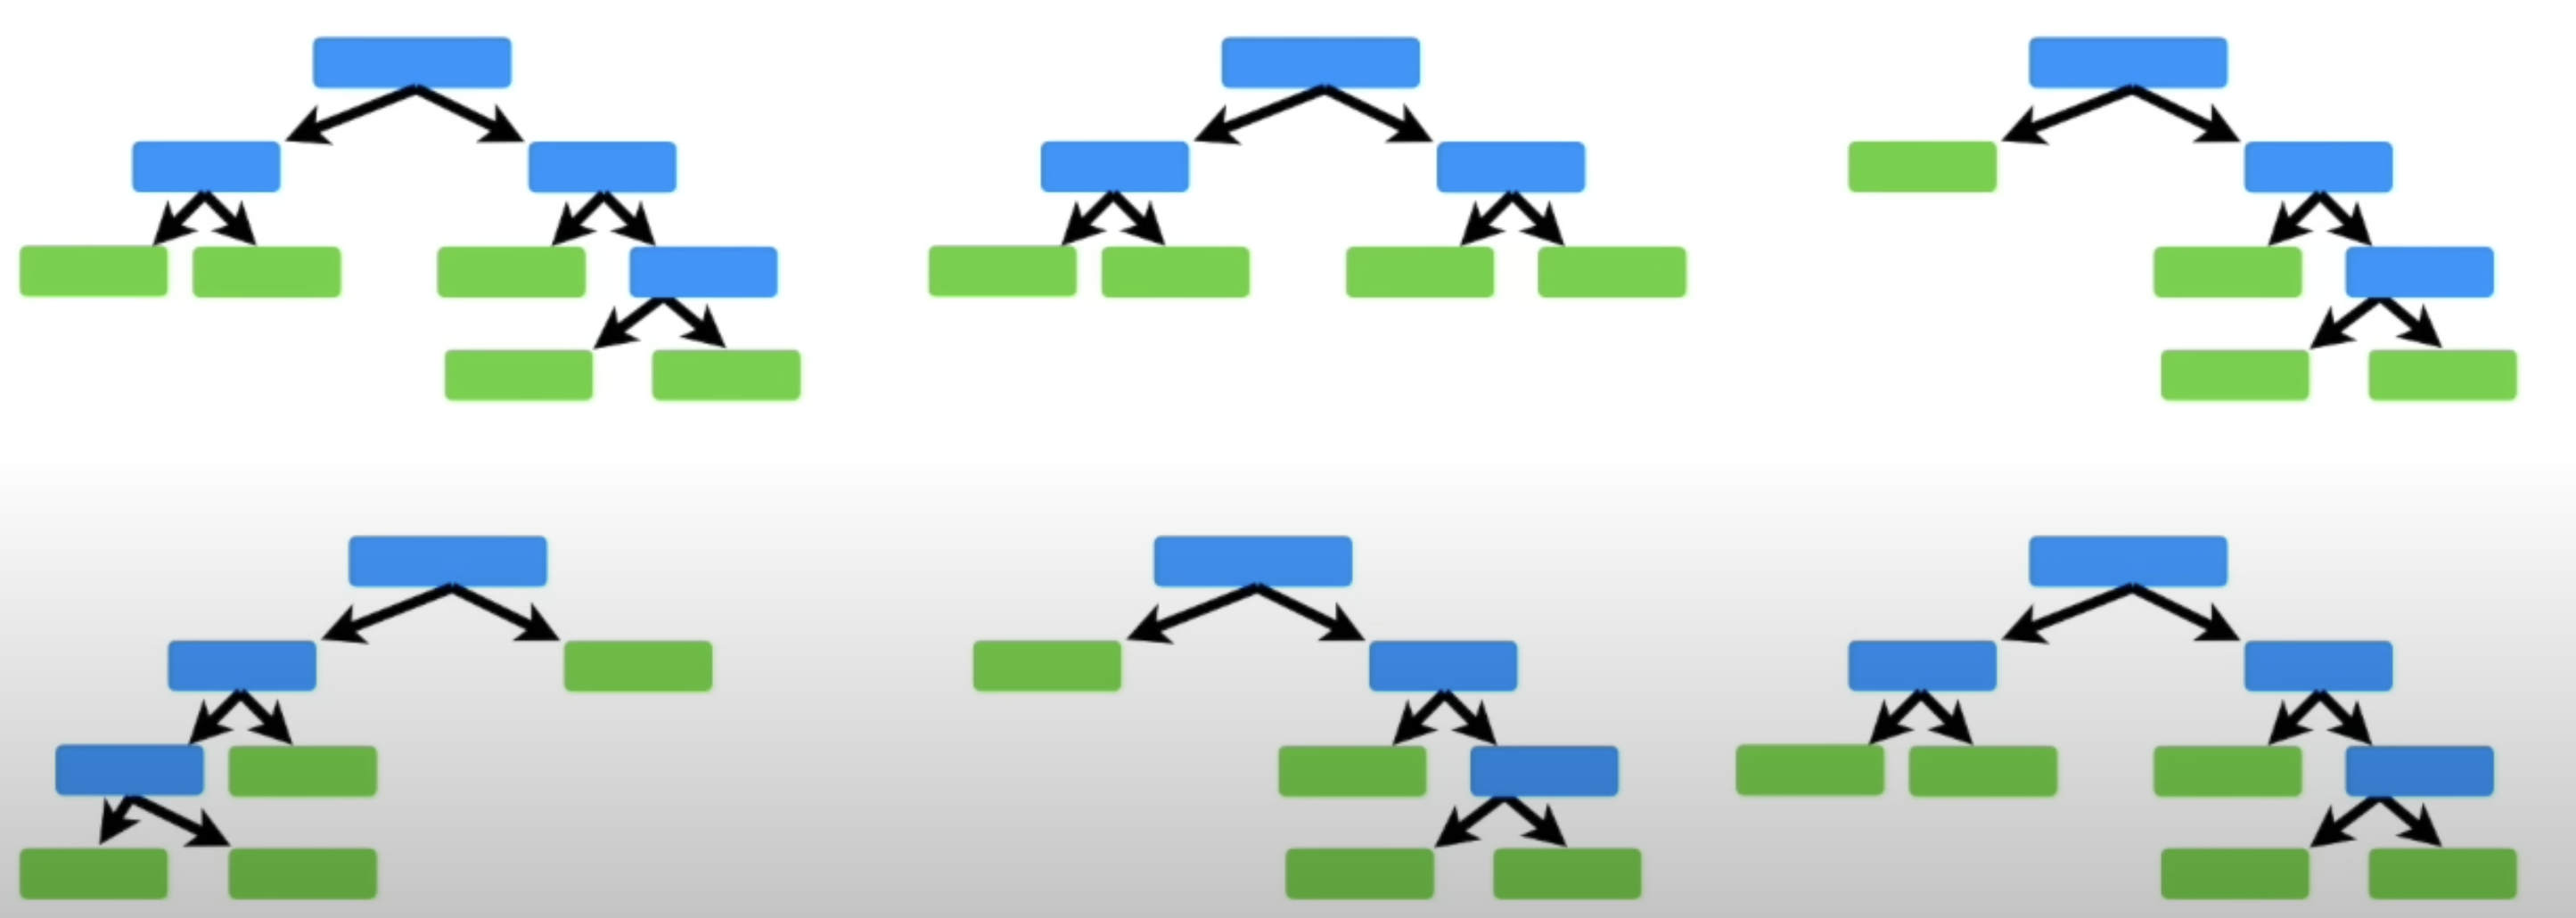

In [36]:
from PIL import Image

# Cargar la imagen
img = Image.open('./images/random_forest_1.png')


# Mostrar la imagen
img

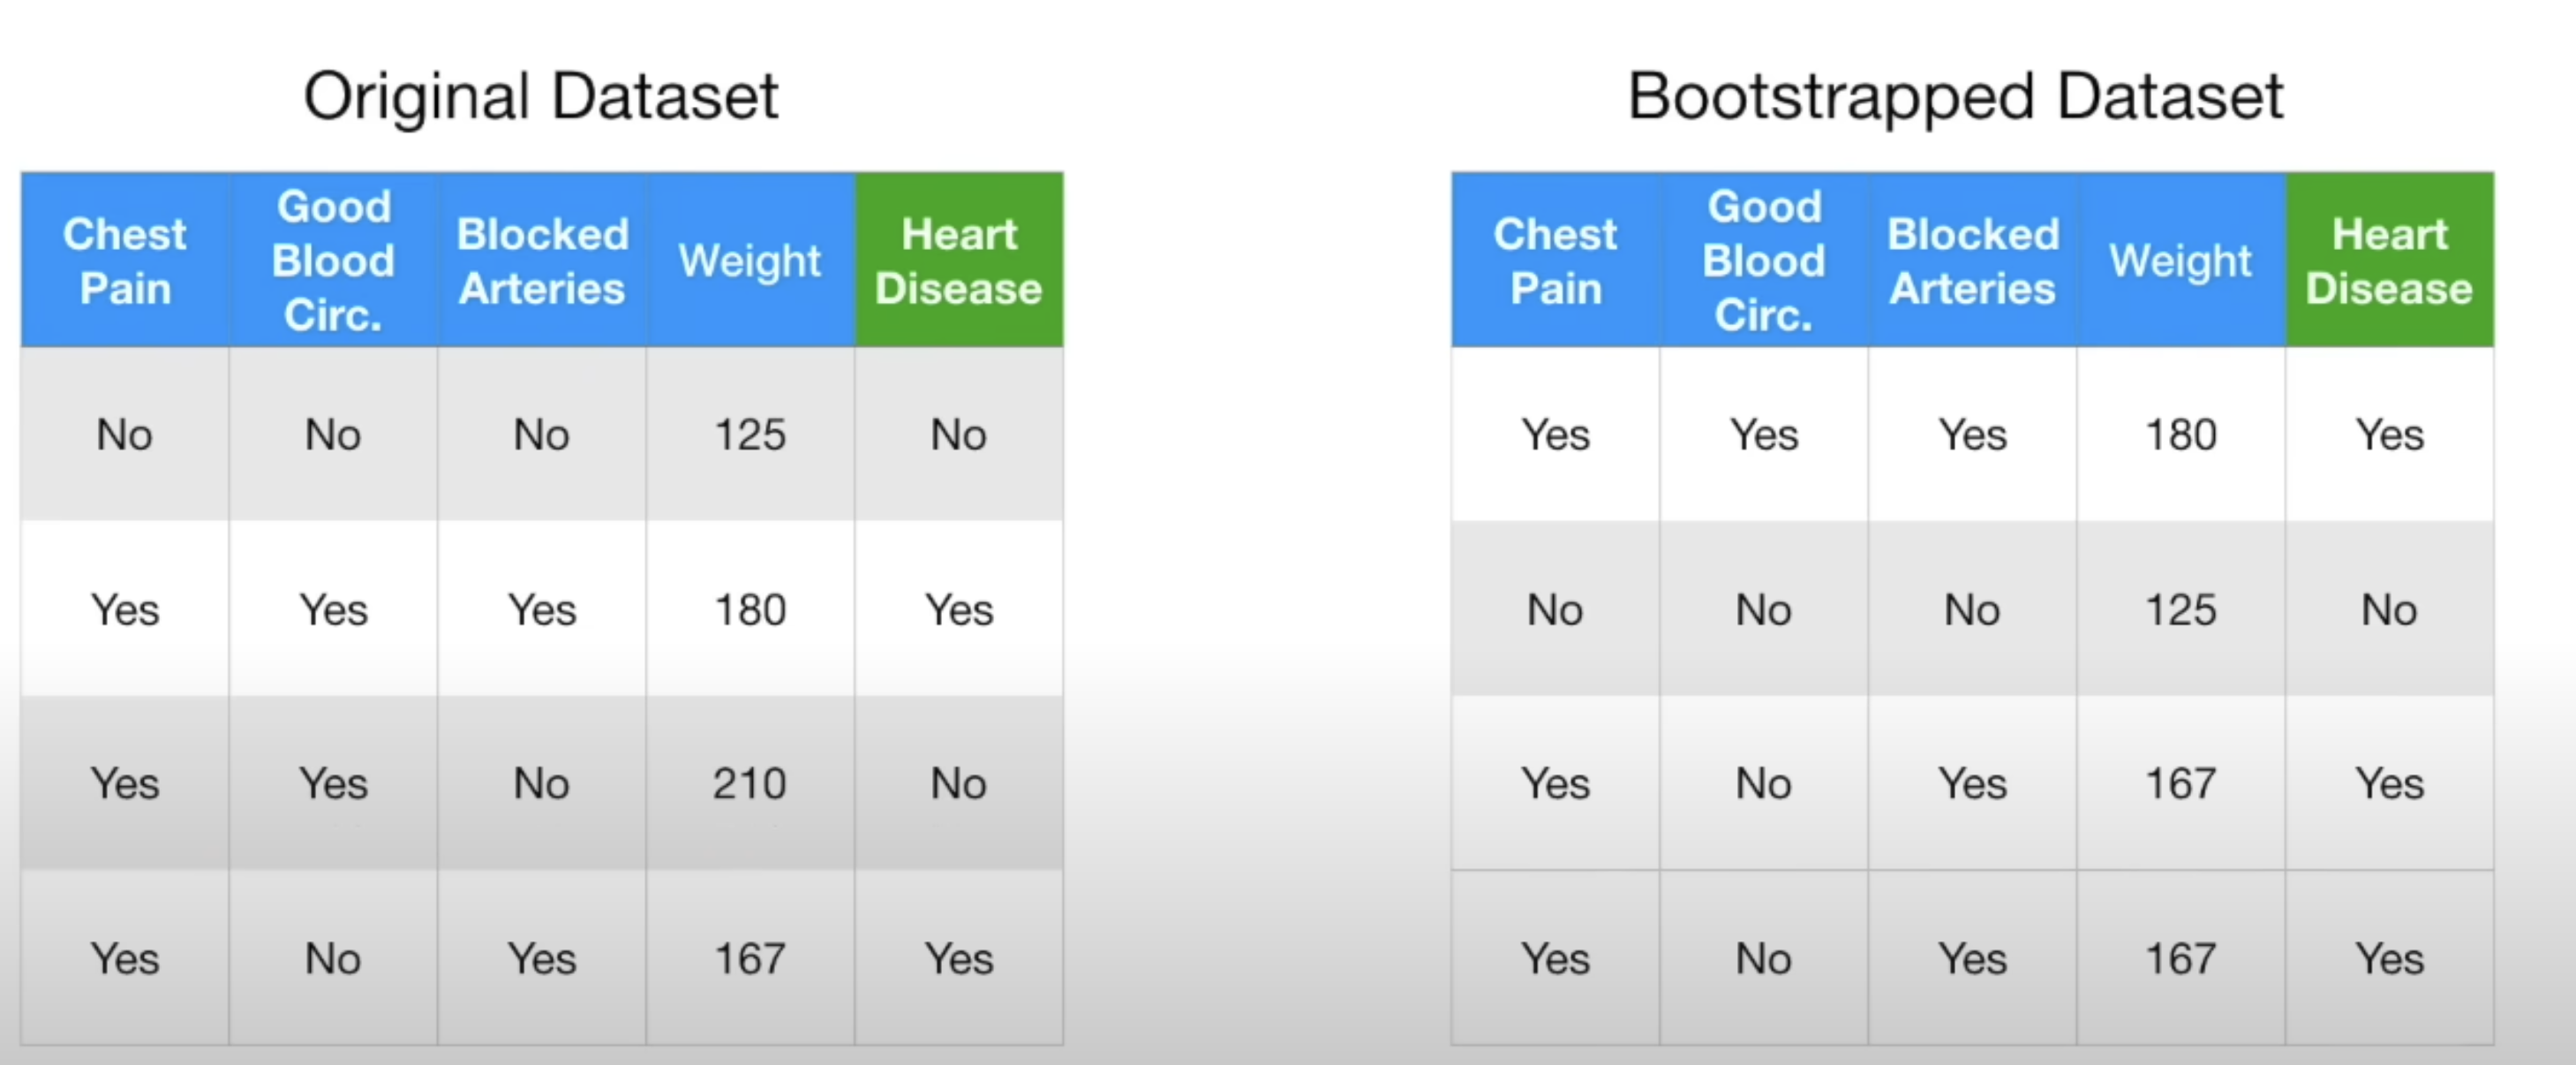

In [ ]:

img = Image.open('./images/boostrap_dataset.png')
img

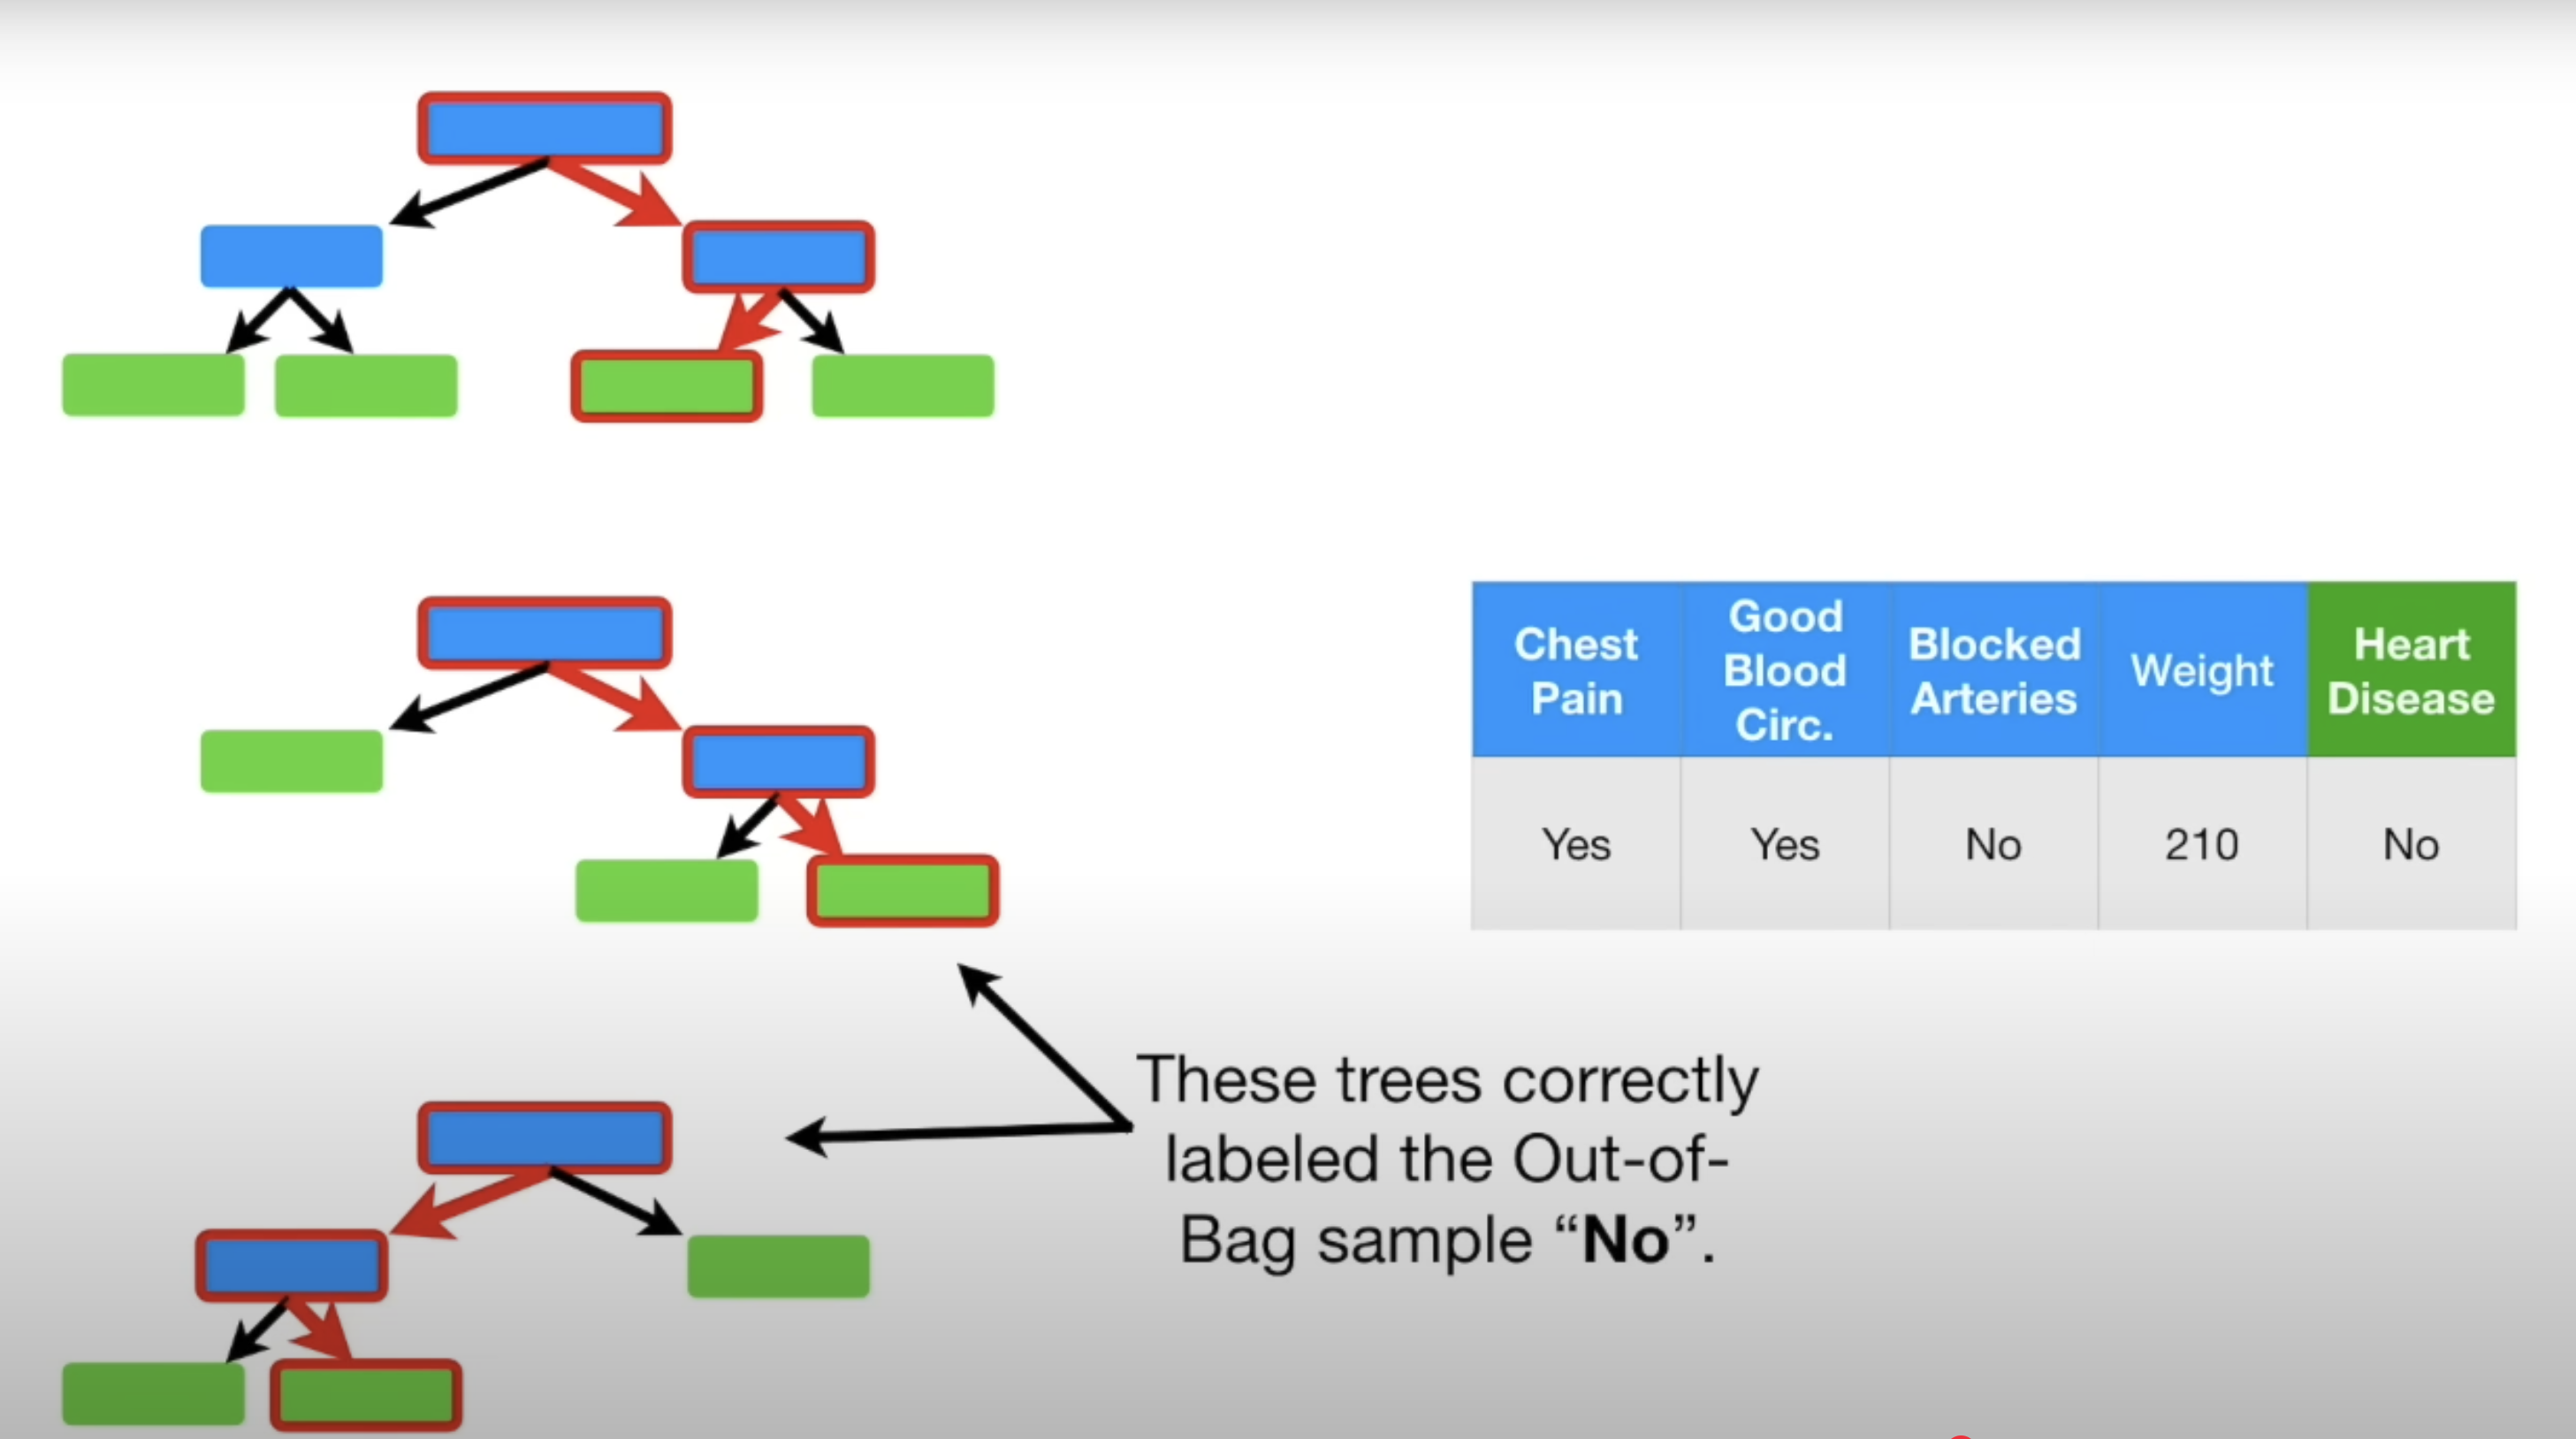

In [38]:

img = Image.open('./images/random_forest_2.png')
img

## **Bibliograf√≠a**

- Starmer, J. (2020, October 21). *StatQuest: Random Forests* [Video]. YouTube.  
  [https://youtu.be/J4Wdy0Wc_xQ](https://youtu.be/J4Wdy0Wc_xQ).  

- Imagen extra√≠da del video *StatQuest: Random Forests*, Starmer, J. (2020, October 21). *StatQuest: Random Forests* [Video]. YouTube.


## **1. Fundamentos de Redes Neuronales**

### 1.1. ¬øQu√© son las redes neuronales?

Las redes neuronales artificiales est√°n inspiradas en la forma en que funciona el cerebro. Est√°n compuestas por **neuronas** conectadas entre s√≠, donde cada neurona:
- **Recibe entradas** (ej. \( x_1, x_2, x_3, \dots \))  
- Las combina de forma **ponderada** (mediante **pesos**, \( w_1, w_2, \dots \))  
- A√±ade un **sesgo** (\( b \)) y  
- Aplica una **funci√≥n de activaci√≥n** (ReLU, Sigmoide, Tanh, etc.) para producir su **salida**.

Para resolver problemas de mayor complejidad, las neuronas se organizan en **capas** (capa de entrada, capas ocultas y capa de salida). El entrenamiento usa:
- **Backpropagation** (retropropagaci√≥n)  
- Un **algoritmo de optimizaci√≥n** (ej. Descenso por Gradiente, Adam, etc.)  
- Una **funci√≥n de p√©rdida** (ej. Error cuadr√°tico medio, Cross Entropy, etc.)

### 1.2. Componentes principales

1. **Pesos**: Multiplican las entradas y determinan la ‚Äúinfluencia‚Äù de cada entrada.
2. **Sesgo**: Valor adicional que se suma a la combinaci√≥n lineal.
3. **Funci√≥n de activaci√≥n**:  
   - **ReLU**(\( z \)) = \(\max(0, z)\)  
   - **Sigmoide**(\( z \)) = \(\frac{1}{1 + e^{-z}}\)  
   - **Tanh**(\( z \)) = \(\tanh(z)\)  
4. **Capas**:
   - **Entrada**: Recibe los datos \((x)\).
   - **Ocultas**: Procesan y transforman las representaciones.
   - **Salida**: Emite la predicci√≥n final.
5. **Funci√≥n de p√©rdida**: Mide la diferencia entre la salida deseada y la predicha.
6. **Backpropagation**: Calcula c√≥mo modificar cada peso para **minimizar** la funci√≥n de p√©rdida.
7. **Optimizaci√≥n**: Ajusta los pesos (ej. usando Adam, SGD, etc.).

---

## **2. Ilustraciones de los componentes**

En esta secci√≥n, usaremos **Python** y **matplotlib** para **dibujar** diagramas que representen gr√°ficamente c√≥mo lucen:
1. **Una neurona individual** con sus entradas, pesos y sesgo.
2. **Una peque√±a red neuronal** con varias neuronas en capas.


### 2.1. Ilustraci√≥n de una neurona individual

El siguiente c√≥digo dibuja:
- Entradas \((x_1, x_2, x_3)\)
- Pesos \((w_1, w_2, w_3)\)
- Sesgo \((b)\)
- La neurona (con su funci√≥n de activaci√≥n)
- Salida \((y)\)

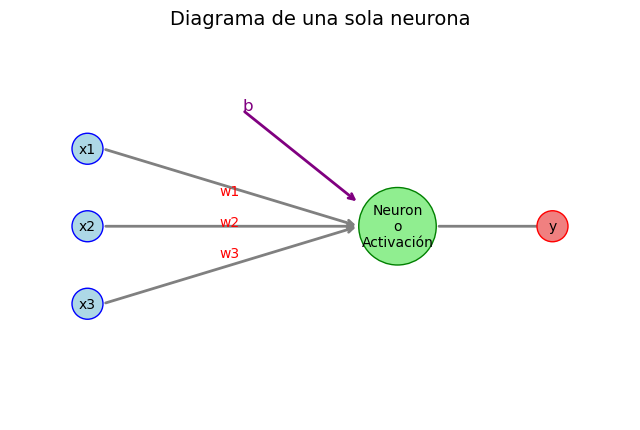

In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_single_neuron_diagram():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim([-1, 7])
    ax.set_ylim([-1, 4])
    ax.set_aspect('equal', adjustable='box')
    
    # Ocultamos ejes para que el diagrama luzca m√°s limpio
    ax.axis('off')
    
    # 1. Dibujamos c√≠rculos para x1, x2, x3 (entradas)
    x_positions = [0, 0, 0]
    y_positions = [2.5, 1.5, 0.5]
    input_labels = ["x1", "x2", "x3"]
    
    for (x_pos, y_pos, label) in zip(x_positions, y_positions, input_labels):
        circle = Circle((x_pos, y_pos), radius=0.2, fc='lightblue', ec='blue', zorder=2)
        ax.add_patch(circle)
        ax.text(x_pos, y_pos, label, ha='center', va='center', fontsize=10)
    
    # 2. Dibujamos la neurona en posici√≥n central
    neuron_pos = (4, 1.5)
    neuron = Circle(neuron_pos, radius=0.5, fc='lightgreen', ec='green', zorder=2)
    ax.add_patch(neuron)
    ax.text(neuron_pos[0], neuron_pos[1], "Neuron\no\nActivaci√≥n",
            ha='center', va='center', fontsize=10)
    
    # 3. Conectamos cada entrada a la neurona con flechas y pesos
    weights = ["w1", "w2", "w3"]
    for i, (x_pos, y_pos, w_label) in enumerate(zip(x_positions, y_positions, weights)):
        arrow = FancyArrowPatch(
            (x_pos + 0.2, y_pos),  # Desde borde derecho del c√≠rculo de entrada
            (neuron_pos[0] - 0.5, neuron_pos[1]),  # Hasta borde izquierdo de la neurona
            arrowstyle='->', mutation_scale=10, lw=2, color='gray'
        )
        ax.add_patch(arrow)
        # Posicionar el texto del peso aproximadamente a mitad de camino
        mid_x = (x_pos + neuron_pos[0]) / 2
        mid_y = (y_pos + neuron_pos[1]) / 2
        ax.text(mid_x - 0.3, mid_y + 0.1*(i-1), w_label, fontsize=10, color='red')
    
    # 4. Agregamos el sesgo (b) en la parte superior
    bias_pos = (2, 3)
    ax.text(bias_pos[0], bias_pos[1], "b", fontsize=12, color='purple')
    arrow_bias = FancyArrowPatch(
        bias_pos,
        (neuron_pos[0] - 0.5, neuron_pos[1] + 0.3),
        arrowstyle='->', mutation_scale=10, lw=2, color='purple'
    )
    ax.add_patch(arrow_bias)
    
    # 5. Salida de la neurona
    output_pos = (6, 1.5)
    arrow_output = FancyArrowPatch(
        (neuron_pos[0] + 0.5, neuron_pos[1]),
        output_pos,
        arrowstyle='->', mutation_scale=10, lw=2, color='gray'
    )
    ax.add_patch(arrow_output)
    
    # Dibujamos un c√≠rculo para la salida
    out_circle = Circle(output_pos, radius=0.2, fc='lightcoral', ec='red', zorder=2)
    ax.add_patch(out_circle)
    ax.text(output_pos[0], output_pos[1], "y", ha='center', va='center', fontsize=10)
    
    plt.title("Diagrama de una sola neurona", fontsize=14)
    plt.show()

# Llamamos a la funci√≥n para visualizar
draw_single_neuron_diagram()

# **Ejemplo: cuando la red neuronal se comporta como una regresi√≥n lineal t√≠pica**




# C√≥mo una Neurona hace internamente una "Regresi√≥n Lineal"

1. Recibe **valores de entrada** (est√≠mulos).
2. Realiza una **suma ponderada** de esas entradas, usando **pesos** para cada conexi√≥n.
3. A√±ade un **sesgo (bias)**, que equivale a la intersecci√≥n en un modelo lineal (el t√©rmino que ‚Äúmueve‚Äù la salida hacia arriba o abajo).
4. Opcionalmente, aplica una **funci√≥n de activaci√≥n** (ReLU, sigmoide, etc.).

Si **NO** hay funci√≥n de activaci√≥n distinta de la identidad, la salida de la neurona es:

\[
\text{Salida} = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b
\]

**Exactamente** lo mismo que la **regresi√≥n lineal**. Por ello, se dice que internamente la neurona se **comporta** como una regresi√≥n lineal si no a√±adimos esa parte no lineal (activaci√≥n).

## Suma Ponderada y Sesgo

- **Pesos (\( w_i \))**: escalan la importancia de cada entrada (\( x_i \)).
- **Bias (\( b \))**: permite desplazar la funci√≥n sin depender exclusivamente de \( x_i \).

\[
z = \sum_{i=1}^n (w_i x_i) + b
\]

Donde \( z \) es la salida antes de aplicar activaci√≥n. Cuando decimos que la funci√≥n de activaci√≥n es la **identidad** (\( f(z) = z \)), tenemos una regresi√≥n lineal pura.

## Diferencia con la Regresi√≥n Lineal "pura"

En redes neuronales **s√≠** usamos funciones de activaci√≥n (ReLU, Sigmoide, Tanh, etc.) que introducen **no linealidad**:
\[
\text{Salida} = f(z) \quad \text{(con } f \text{ no lineal)}
\]
Esto hace que la red neuronal sea mucho m√°s potente que la simple regresi√≥n lineal, pues puede aprender **patrones no lineales**. Pero, en esencia, el coraz√≥n de la neurona (la combinaci√≥n lineal + sesgo) es id√©ntico a lo que viste en la regresi√≥n lineal.

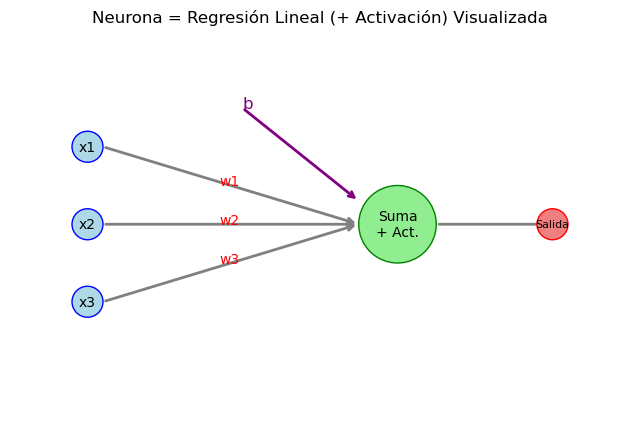

In [44]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_single_neuron_diagram():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim([-1, 7])
    ax.set_ylim([-1, 4])
    ax.set_aspect('equal', adjustable='box')
    
    # Ocultar ejes para mayor claridad
    ax.axis('off')
    
    # 1. C√≠rculos para las entradas x1, x2, x3
    x_positions = [0, 0, 0]
    y_positions = [2.5, 1.5, 0.5]
    input_labels = ["x1", "x2", "x3"]
    
    for (x_pos, y_pos, label) in zip(x_positions, y_positions, input_labels):
        circle = Circle((x_pos, y_pos), radius=0.2, fc='lightblue', ec='blue', zorder=2)
        ax.add_patch(circle)
        ax.text(x_pos, y_pos, label, ha='center', va='center', fontsize=10)
    
    # 2. Neurona (suma + activaci√≥n)
    neuron_pos = (4, 1.5)
    neuron = Circle(neuron_pos, radius=0.5, fc='lightgreen', ec='green', zorder=2)
    ax.add_patch(neuron)
    ax.text(neuron_pos[0], neuron_pos[1], "Suma\n+ Act.",
            ha='center', va='center', fontsize=10)
    
    # 3. Flechas con pesos
    weights = ["w1", "w2", "w3"]
    for i, (x_pos, y_pos, w_label) in enumerate(zip(x_positions, y_positions, weights)):
        arrow = FancyArrowPatch(
            (x_pos + 0.2, y_pos),
            (neuron_pos[0] - 0.5, neuron_pos[1]),
            arrowstyle='->', mutation_scale=10, lw=2, color='gray'
        )
        ax.add_patch(arrow)
        mid_x = (x_pos + neuron_pos[0]) / 2
        mid_y = (y_pos + neuron_pos[1]) / 2
        ax.text(mid_x - 0.3, mid_y, w_label, fontsize=10, color='red')
    
    # 4. Sesgo (bias)
    bias_pos = (2, 3)
    ax.text(bias_pos[0], bias_pos[1], "b", fontsize=12, color='purple')
    arrow_bias = FancyArrowPatch(
        bias_pos,
        (neuron_pos[0] - 0.5, neuron_pos[1] + 0.3),
        arrowstyle='->', mutation_scale=10, lw=2, color='purple'
    )
    ax.add_patch(arrow_bias)
    
    # 5. Salida
    output_pos = (6, 1.5)
    arrow_output = FancyArrowPatch(
        (neuron_pos[0] + 0.5, neuron_pos[1]),
        output_pos,
        arrowstyle='->', mutation_scale=10, lw=2, color='gray'
    )
    ax.add_patch(arrow_output)
    
    out_circle = Circle(output_pos, radius=0.2, fc='lightcoral', ec='red', zorder=2)
    ax.add_patch(out_circle)
    ax.text(output_pos[0], output_pos[1], "Salida", ha='center', va='center', fontsize=8)
    
    plt.title("Neurona = Regresi√≥n Lineal (+ Activaci√≥n) Visualizada")
    plt.show()

# Llamamos a la funci√≥n para generar la ilustraci√≥n
draw_single_neuron_diagram()

# Conclusi√≥n

- **Sin** una funci√≥n de activaci√≥n no lineal, la **neurona** se limita a una **regresi√≥n lineal** con suma ponderada y bias.
- **Con** funciones de activaci√≥n (ReLU, Sigmoide, etc.), la neurona adquiere **no linealidad**. 
- Cuando muchas neuronas se conectan en **capas** (y cada una aplica su activaci√≥n), surge la posibilidad de aprender **funciones complejas** que van mucho m√°s all√° de lo lineal.

**¬°Esa es la clave** de por qu√© los modelos de redes neuronales pueden resolver problemas que la regresi√≥n lineal pura no alcanza a modelar!

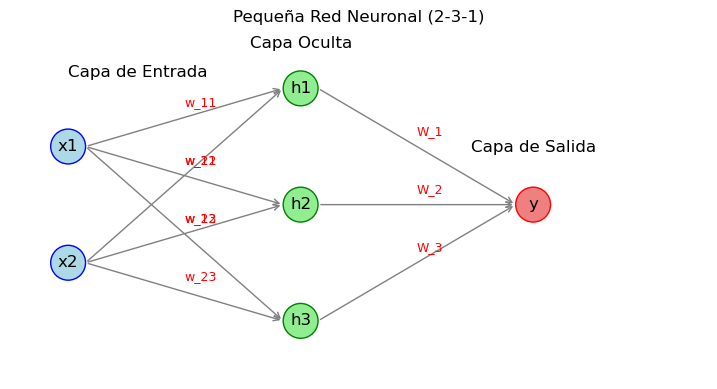

In [45]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_small_network():
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_xlim([-1, 11])
    ax.set_ylim([-1, 5])
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    
    # --- Capa de entrada (2 neuronas) ---
    input_layer_coords = [(0, 3), (0, 1)]
    for i, coord in enumerate(input_layer_coords):
        circle = Circle(coord, radius=0.3, fc='lightblue', ec='blue')
        ax.add_patch(circle)
        ax.text(coord[0], coord[1], f"x{i+1}", ha='center', va='center', fontsize=12)

    # --- Capa oculta (3 neuronas) ---
    hidden_layer_coords = [(4, 4), (4, 2), (4, 0)]
    for i, coord in enumerate(hidden_layer_coords):
        circle = Circle(coord, radius=0.3, fc='lightgreen', ec='green')
        ax.add_patch(circle)
        ax.text(coord[0], coord[1], f"h{i+1}", ha='center', va='center', fontsize=12)

    # --- Capa de salida (1 neurona) ---
    output_layer_coord = (8, 2)
    out_circle = Circle(output_layer_coord, radius=0.3, fc='lightcoral', ec='red')
    ax.add_patch(out_circle)
    ax.text(output_layer_coord[0], output_layer_coord[1], "y", ha='center', va='center', fontsize=12)
    
    # Conexiones desde capa de entrada a capa oculta
    for i, in_coord in enumerate(input_layer_coords):
        for j, hid_coord in enumerate(hidden_layer_coords):
            arrow = FancyArrowPatch(
                (in_coord[0]+0.3, in_coord[1]),
                (hid_coord[0]-0.3, hid_coord[1]),
                arrowstyle='->',
                mutation_scale=10,
                lw=1,
                color='gray'
            )
            ax.add_patch(arrow)
            # Posicionamos un posible texto de "w_ij" en la mitad
            mid_x = (in_coord[0] + hid_coord[0]) / 2
            mid_y = (in_coord[1] + hid_coord[1]) / 2
            ax.text(mid_x, mid_y+0.2, f"w_{i+1}{j+1}", fontsize=9, color='red')
    
    # Conexiones desde capa oculta a capa de salida
    for j, hid_coord in enumerate(hidden_layer_coords):
        arrow = FancyArrowPatch(
            (hid_coord[0]+0.3, hid_coord[1]),
            (output_layer_coord[0]-0.3, output_layer_coord[1]),
            arrowstyle='->',
            mutation_scale=10,
            lw=1,
            color='gray'
        )
        ax.add_patch(arrow)
        # Etiqueta para el peso
        mid_x = (hid_coord[0] + output_layer_coord[0]) / 2
        mid_y = (hid_coord[1] + output_layer_coord[1]) / 2
        ax.text(mid_x, mid_y+0.2, f"W_{j+1}", fontsize=9, color='red')
    
    # T√≠tulos y texto
    ax.text(0, 4.2, "Capa de Entrada", fontsize=12, ha='left')
    ax.text(4, 4.7, "Capa Oculta", fontsize=12, ha='center')
    ax.text(8, 2.9, "Capa de Salida", fontsize=12, ha='center')
    
    plt.title("Peque√±a Red Neuronal (2-3-1)")
    plt.show()

# Dibujamos la red
draw_small_network()

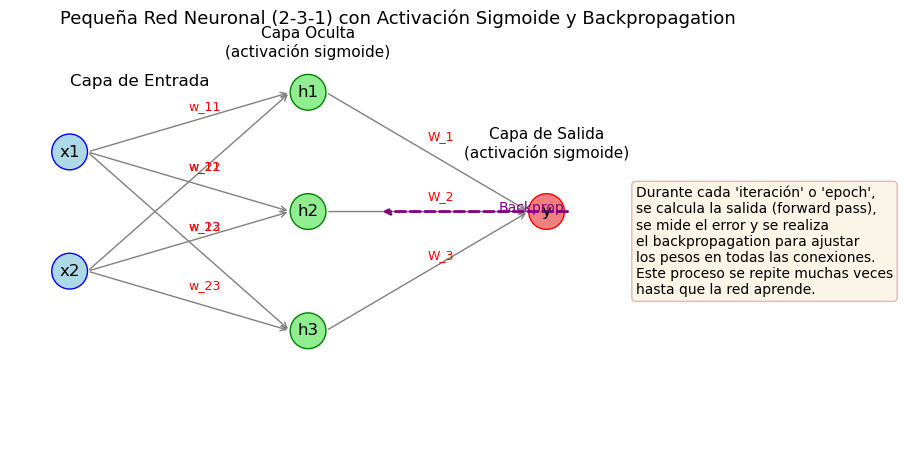

# **Red Neuronal**

En este documento encontrar√°s un ejemplo de c√≥mo implementar una **red neuronal** para aprender la funci√≥n XOR utilizando el **algoritmo de backpropagation** (**retropropagaci√≥n** del error) de forma **manual** (sin usar librer√≠as de alto nivel como TensorFlow o PyTorch). Ver√°s **cada parte** del c√≥digo **explicada** exhaustivamente.

---


## **2. Explicaci√≥n General de la Red Neuronal**

### 2.1 Arquitectura

Nuestra red tendr√°:
- **Entrada**: 2 neuronas (porque cada ejemplo es \((x_1, x_2)\)).
- **Capa Oculta**: 2 neuronas con **activaci√≥n sigmoide**.
- **Capa de Salida**: 1 neurona (tambi√©n con **activaci√≥n sigmoide**).


### 2.2. Pesos y Sesgos

- Llamaremos **w1** (matriz de pesos) y **b1** (bias) a los **par√°metros** de la capa oculta.  
- Llamaremos **w2** y **b2** a los de la capa de salida.


### 2.4. Funci√≥n de Costo

Usaremos **Error Cuadr√°tico Medio (MSE)**:

\[
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
\]

donde \(\hat{y} = a2\) es la predicci√≥n, \(y\) es el valor real, y \(m\) es el n√∫mero de ejemplos.

### 2.5. Backpropagation

- Calculamos la derivada de \(\text{MSE}\) respecto a cada **par√°metro** (\(w1, b1, w2, b2\)) usando la **regla de la cadena**.
- Despu√©s **ajustamos** cada par√°metro con:
  \[
  \theta \leftarrow \theta - \eta \frac{\partial \text{MSE}}{\partial \theta}
  \]
  donde \(\eta\) es la **tasa de aprendizaje** (*learning rate*).

### 2.6. √âpocas (epochs)

Un **epoch** es **una pasada completa** sobre todos los datos de entrenamiento. 

---

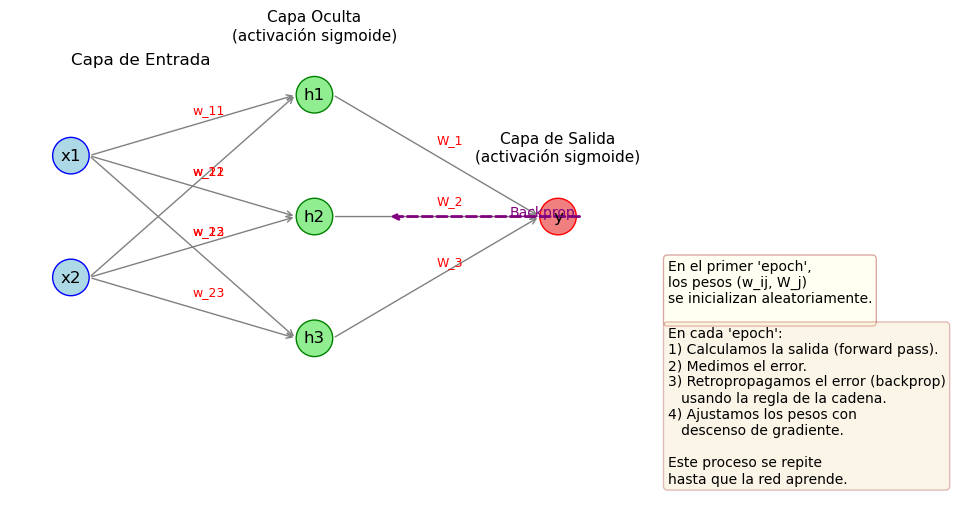

In [57]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_small_network_sigmoid_backprop():
    """
    Dibuja una red neuronal (2-3-1) y muestra de forma ilustrativa:
    - Capa de entrada con 2 neuronas (x1, x2).
    - Capa oculta con 3 neuronas (h1, h2, h3) con activaci√≥n sigmoide.
    - Capa de salida con 1 neurona (y) tambi√©n usando sigmoide.
    - Conexiones entre capas con pesos.
    - Explicaci√≥n de c√≥mo en el primer epoch se inicializan pesos aleatorios,
      y luego se aplican forward pass, c√°lculo del error, backpropagation
      (regla de la cadena) y optimizaci√≥n con descenso de gradiente, 
      a lo largo de m√∫ltiples epochs.
    """
    
    fig, ax = plt.subplots(figsize=(11, 7))
    ax.set_xlim([-1, 13])
    ax.set_ylim([-1, 7])
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    
    # --- Capa de entrada (2 neuronas) ---
    input_layer_coords = [(0, 5), (0, 3)]
    for i, coord in enumerate(input_layer_coords):
        circle = Circle(coord, radius=0.3, fc='lightblue', ec='blue')
        ax.add_patch(circle)
        ax.text(coord[0], coord[1], f"x{i+1}", ha='center', va='center', fontsize=12)
    
    # --- Capa oculta (3 neuronas) ---
    hidden_layer_coords = [(4, 6), (4, 4), (4, 2)]
    for i, coord in enumerate(hidden_layer_coords):
        circle = Circle(coord, radius=0.3, fc='lightgreen', ec='green')
        ax.add_patch(circle)
        ax.text(coord[0], coord[1], f"h{i+1}", ha='center', va='center', fontsize=12)
    
    # --- Capa de salida (1 neurona) ---
    output_layer_coord = (8, 4)
    out_circle = Circle(output_layer_coord, radius=0.3, fc='lightcoral', ec='red')
    ax.add_patch(out_circle)
    ax.text(output_layer_coord[0], output_layer_coord[1], "y", ha='center', va='center', fontsize=12)
    
    # Conexiones desde capa de entrada a capa oculta
    for i, in_coord in enumerate(input_layer_coords):
        for j, hid_coord in enumerate(hidden_layer_coords):
            arrow = FancyArrowPatch(
                (in_coord[0] + 0.3, in_coord[1]),
                (hid_coord[0] - 0.3, hid_coord[1]),
                arrowstyle='->',
                mutation_scale=10,
                lw=1,
                color='gray'
            )
            ax.add_patch(arrow)
            # Etiqueta w_ij en el camino
            mid_x = (in_coord[0] + hid_coord[0]) / 2
            mid_y = (in_coord[1] + hid_coord[1]) / 2
            ax.text(mid_x, mid_y + 0.2, f"w_{i+1}{j+1}", fontsize=9, color='red')
    
    # Conexiones desde capa oculta a capa de salida
    for j, hid_coord in enumerate(hidden_layer_coords):
        arrow = FancyArrowPatch(
            (hid_coord[0] + 0.3, hid_coord[1]),
            (output_layer_coord[0] - 0.3, output_layer_coord[1]),
            arrowstyle='->',
            mutation_scale=10,
            lw=1,
            color='gray'
        )
        ax.add_patch(arrow)
        mid_x = (hid_coord[0] + output_layer_coord[0]) / 2
        mid_y = (hid_coord[1] + output_layer_coord[1]) / 2
        ax.text(mid_x, mid_y + 0.2, f"W_{j+1}", fontsize=9, color='red')
    
    # T√≠tulos de capas
    ax.text(0, 6.5, "Capa de Entrada", fontsize=12, ha='left')
    ax.text(4, 6.9, "Capa Oculta\n(activaci√≥n sigmoide)", fontsize=11, ha='center')
    ax.text(8, 4.9, "Capa de Salida\n(activaci√≥n sigmoide)", fontsize=11, ha='center')
    
    # Texto adicional sobre inicializaci√≥n aleatoria
    ax.text(9.8, 3.3, 
            "En el primer 'epoch',\n"
            "los pesos (w_ij, W_j)\n"
            "se inicializan aleatoriamente.\n",
            fontsize=10, va='top', ha='left',
            bbox=dict(boxstyle="round", fc="lightyellow", ec="brown", alpha=0.4))
    
    # Texto sobre forward pass, backprop y epochs
    ax.text(9.8, 2.2, 
            "En cada 'epoch':\n"
            "1) Calculamos la salida (forward pass).\n"
            "2) Medimos el error.\n"
            "3) Retropropagamos el error (backprop)\n"
            "   usando la regla de la cadena.\n"
            "4) Ajustamos los pesos con\n"
            "   descenso de gradiente.\n"
            "\nEste proceso se repite\n"
            "hasta que la red aprende.",
            fontsize=10, va='top', ha='left',
            bbox=dict(boxstyle="round", fc="wheat", ec="brown", alpha=0.3))
    
    # Flecha conceptual que muestra la retropropagaci√≥n
    backprop_arrow = FancyArrowPatch(
        (output_layer_coord[0] + 0.4, output_layer_coord[1]),
        (hidden_layer_coords[1][0] + 1.2, hidden_layer_coords[1][1]),
        arrowstyle='->',
        mutation_scale=10,
        lw=2,
        color='purple',
        linestyle='--'
    )
    ax.add_patch(backprop_arrow)
    ax.text((output_layer_coord[0] + hidden_layer_coords[1][0]) / 2 + 1.2,
            (output_layer_coord[1] + hidden_layer_coords[1][1]) / 2,
            "Backprop", fontsize=10, color='purple')
    
    plt.title("", fontsize=13)
    plt.show()


# Ejecutar la funci√≥n para visualizar la red
draw_small_network_sigmoid_backprop()

In [47]:
# Fijamos semilla para reproducibilidad
np.random.seed(42)

# w1: pesos capa oculta, forma (2, 2) -> 2 entradas x 2 neuronas ocultas
w1 = np.random.randn(2, 2)
# b1: bias capa oculta, forma (1, 2)
b1 = np.random.randn(1, 2)

# w2: pesos capa salida, forma (2, 1) -> 2 neuronas ocultas x 1 neurona salida
w2 = np.random.randn(2, 1)
# b2: bias capa salida, forma (1, 1)
b2 = np.random.randn(1, 1)

# Funci√≥n de activaci√≥n sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivada de la sigmoide
def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [48]:
def forward_pass(X, w1, b1, w2, b2):
    """
    X: (batch_size, 2)
    w1: (2, 2), b1: (1, 2)
    w2: (2, 1), b2: (1, 1)
    """
    # Capa oculta
    z1 = np.dot(X, w1) + b1  # (batch_size, 2)
    a1 = sigmoid(z1)         # Activaci√≥n capa oculta
    # Capa de salida
    z2 = np.dot(a1, w2) + b2 # (batch_size, 1)
    a2 = sigmoid(z2)         # Activaci√≥n capa salida
    return z1, a1, z2, a2

In [49]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [50]:
def backprop(X, y, w1, b1, w2, b2, eta=0.1):
    """
    Un paso de backpropagation + actualizaci√≥n.
    
    eta: tasa de aprendizaje
    Retorna los par√°metros actualizados (w1, b1, w2, b2).
    """
    # 1) Forward pass
    z1, a1, z2, a2 = forward_pass(X, w1, b1, w2, b2)
    
    # N√∫mero de ejemplos
    m = X.shape[0]
    
    # 2) C√°lculo del error (MSE)
    loss = mse_loss(y, a2)
    
    # 3) Backprop:
    # dLoss/da2 = 2 * (a2 - y) / m   (derivada MSE wrt la predicci√≥n)
    dL_da2 = 2 * (a2 - y) / m
    
    # dLoss/dz2 = dLoss/da2 * da2/dz2 = dLoss/da2 * sig'(z2)
    dL_dz2 = dL_da2 * sigmoid_prime(z2)  # shape (batch_size, 1)
    
    # Gradientes para capa de salida:
    # dLoss/dw2 = a1^T * dL_dz2
    dL_dw2 = np.dot(a1.T, dL_dz2)        # shape (2, 1)
    # dLoss/db2 = sum(dL_dz2) a lo largo del batch
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)  # shape (1, 1)
    
    # Retropropagar a la capa oculta:
    # dL_da1 = dL_dz2 * w2^T
    dL_da1 = np.dot(dL_dz2, w2.T)        # shape (batch_size, 2)
    # dL_dz1 = dL_da1 * sig'(z1)
    dL_dz1 = dL_da1 * sigmoid_prime(z1)  # shape (batch_size, 2)
    
    # Gradientes para capa oculta:
    # dL_dw1 = X^T * dL_dz1
    dL_dw1 = np.dot(X.T, dL_dz1)         # shape (2, 2)
    # dL_db1 = sum(dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)  # shape (1, 2)
    
    # 4) Actualizar par√°metros con Gradiente Descendente
    w2 -= eta * dL_dw2
    b2 -= eta * dL_db2
    w1 -= eta * dL_dw1
    b1 -= eta * dL_db1
    
    return w1, b1, w2, b2, loss

In [51]:
epochs = 20000
eta = 0.1  # learning rate

loss_history = []

for epoch in range(epochs):
    w1, b1, w2, b2, loss = backprop(X, y, w1, b1, w2, b2, eta)
    loss_history.append(loss)
    
    # Podemos imprimir cada cierto n√∫mero de √©pocas
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Mostrar el √∫ltimo valor de loss
print(f"Final Loss: {loss_history[-1]:.4f}")

Epoch 0, Loss: 0.2944
Epoch 2000, Loss: 0.2444
Epoch 4000, Loss: 0.2035
Epoch 6000, Loss: 0.1533
Epoch 8000, Loss: 0.0463
Epoch 10000, Loss: 0.0156
Epoch 12000, Loss: 0.0084
Epoch 14000, Loss: 0.0056
Epoch 16000, Loss: 0.0041
Epoch 18000, Loss: 0.0033
Final Loss: 0.0027


In [52]:
_, _, _, a2 = forward_pass(X, w1, b1, w2, b2)
predicciones = (a2 > 0.5).astype(int)

print("Predicciones:\n", predicciones.ravel())
print("Valores reales:\n", y.ravel())

Predicciones:
 [0 1 1 0]
Valores reales:
 [0 1 1 0]


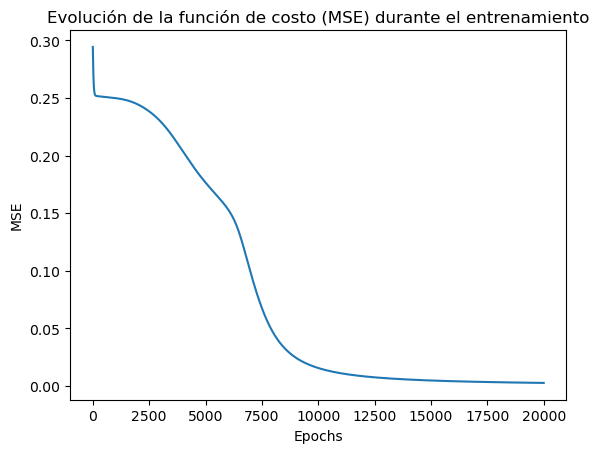

In [54]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.title("Evoluci√≥n de la funci√≥n de costo (MSE) durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()